INSTALLINNG LIBRARIES & IMPORTING THEM

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 41.0 MB/s 
     |████████████████████████████████| 6.3 MB 30.8 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [ ]:
pip install mapclassify

In [ ]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import cluster
import geopandas as gpd

READING SHAPEFILE AS GEOPANDAS DATAFRAME

In [ ]:
gmc_pv = gpd.read_file('/content/gmc_pv.shp')

VIEWING DATASETS INFORMATION

In [ ]:
gmc_pv.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    39 non-null     int64   
 1   SHAPE_Leng  39 non-null     float64 
 2   Sector_No   39 non-null     object  
 3   Ward_No     39 non-null     int64   
 4   Zone        39 non-null     object  
 5   Zone_Id     39 non-null     int64   
 6   Ward_Name   39 non-null     object  
 7   Shape_Le_1  39 non-null     float64 
 8   Shape_Area  39 non-null     float64 
 9   OBJECTID_1  39 non-null     int64   
 10  Building_F  38 non-null     object  
 11  FREQUENCY   39 non-null     int64   
 12  SUM_Buildi  39 non-null     float64 
 13  SUM_Buil_1  39 non-null     float64 
 14  SUM_Buil_2  39 non-null     float64 
 15  SUM_Buil_3  39 non-null     float64 
 16  geometry    39 non-null     geometry
dtypes: float64(7), geometry(1), int64(5), object(4)
memory usage: 5.3+ KB


RENAMING OUR COLUMNS

In [ ]:
gmc_pv = gmc_pv.rename(columns={"SUM_Buil_3":"Dialy Rooftop Solar (kWh)"})
gmc_pv = gmc_pv.rename(columns={"SUM_Buil_2":"Annual Rooftop Solar (kWh)"})
gmc_pv = gmc_pv.rename(columns={"SUM_Buil_1":"Annual Energy Consumption (kWh)"})
gmc_pv = gmc_pv.rename(columns={"SUM_Buildi":"Usable Rooftop Area (sqm)"})

In [ ]:
gmc_pv.head()

,OBJECTID,SHAPE_Leng,Sector_No,Ward_No,Zone,Zone_Id,Ward_Name,Shape_Le_1,Shape_Area,OBJECTID_1,Building_F,FREQUENCY,Usable Rooftop Area (sqm),Annual Energy Consumption (kWh),Annual Rooftop Solar (kWh),Dialy Rooftop Solar (kWh),geometry
0,1,3411.971208,1,8,Zone-2,2,Ward No - 8,3411.971208,6.108489e+05,2,1,642,53160.173309,25984350.0,1.220026e+07,71190.0,"POLYGON ((259664.856 2567569.699, 259288.618 2..."
1,2,4033.881590,2,8,Zone-2,2,Ward No - 8,4033.881590,9.907754e+05,13,2,2752,116885.376069,66701925.0,2.682519e+07,182745.0,"POLYGON ((258750.454 2568120.562, 258658.159 2..."
2,3,3489.010672,3,7,Zone-2,2,Ward No - 7,3489.010664,7.345760e+05,28,3,2395,110674.863308,61028000.0,2.539988e+07,167200.0,"POLYGON ((258048.672 2568543.195, 257801.021 2..."
3,5,3697.716912,4,8,Zone-2,2,Ward No - 8,3697.716912,8.387920e+05,31,4,2345,102937.835254,49309675.0,2.362423e+07,135095.0,"POLYGON ((257353.874 2568954.217, 257338.961 2..."
4,6,4457.853398,8,6,Zone-2,2,Ward No - 6,4457.853398,1.274675e+06,35,8,1058,79740.236820,28962750.0,1.830038e+07,79350.0,"POLYGON ((259987.807 2568600.204, 260128.387 2..."


VIEWING DATA FRAME

In [ ]:
print("Dataframe columns:", gmc_pv.columns)

Dataframe columns: Index(['OBJECTID', 'SHAPE_Leng', 'Sector_No', 'Ward_No', 'Zone', 'Zone_Id',
       'Ward_Name', 'Shape_Le_1', 'Shape_Area', 'OBJECTID_1', 'Building_F',
       'FREQUENCY', 'Usable Rooftop Area (sqm)',
       'Annual Energy Consumption (kWh)', 'Annual Rooftop Solar (kWh)',
       'Dialy Rooftop Solar (kWh)', 'geometry'],
      dtype='object')


In [ ]:
pv_analysis = ["Dialy Rooftop Solar (kWh)","Annual Rooftop Solar (kWh)",
               "Annual Energy Consumption (kWh)","Usable Rooftop Area (sqm)"]

GETTING TO KNOW THE DATA

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


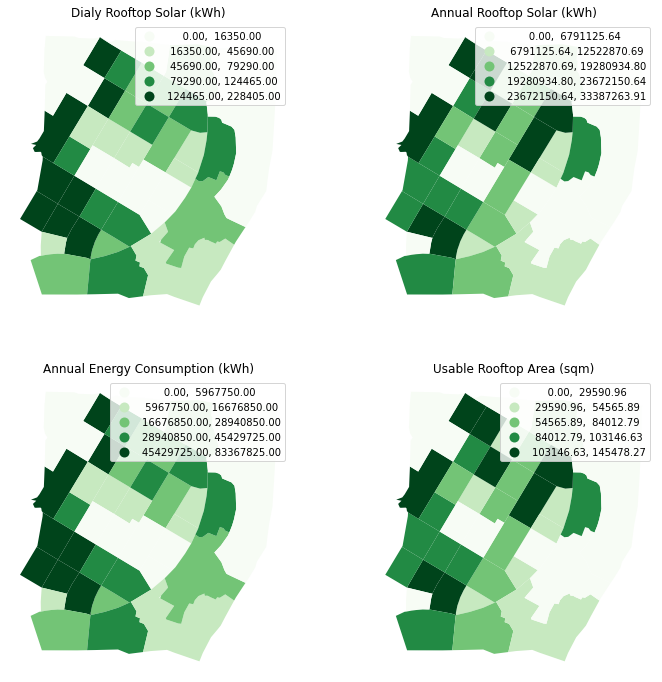

In [ ]:
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(pv_analysis):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    gmc_pv.plot(column=col, axes=ax, scheme='Quantiles', linewidth=0, cmap='Greens', legend = 'true')
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

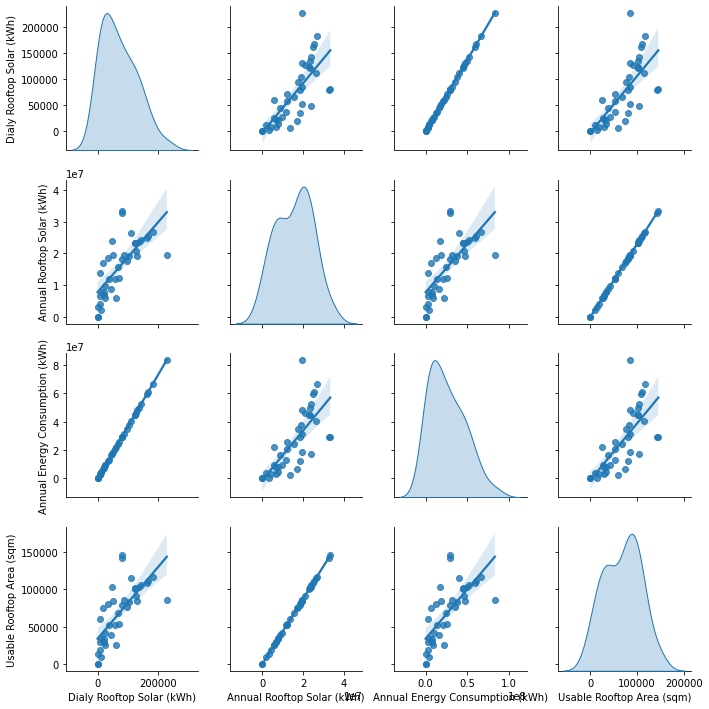

In [ ]:
sb_pairplots = sns.pairplot(gmc_pv[pv_analysis], kind='reg', diag_kind='kde')

K_MEANS CLUSTERING

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


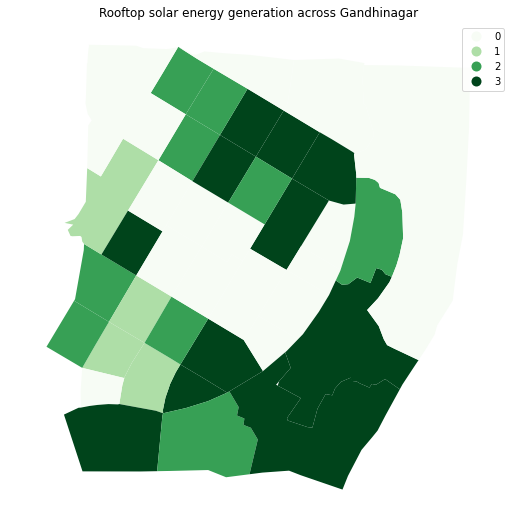

In [ ]:
kmeans4 = cluster.KMeans(n_clusters=4)
columns=['Dialy Rooftop Solar (kWh)']
data = gmc_pv[columns]
k4cls = kmeans4.fit(data)

gmc_pv['labels'] = k4cls.labels_ 
gmc_pv.columns

f, ax = plt.subplots(1, figsize=(9, 9))

gmc_pv.plot(column='labels', categorical=True, legend=True, linewidth=0, cmap ='Greens', axes=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title('Rooftop solar energy generation across Gandhinagar')
# Display the map
plt.show()

FINDING OPTIMAL K-MEANS VALUE

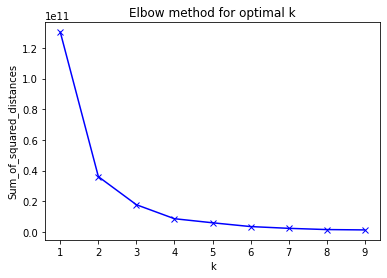

In [ ]:
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    k_means = cluster.KMeans(n_clusters=k)
    model = k_means.fit(data)
    sum_of_squared_distances.append(k_means.inertia_) 
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()